In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn
import scipy.optimize as opt
import pylab as pl
%matplotlib inline

In [4]:
clinical_df=pd.read_csv("covid-19 symptoms dataset.csv")
clinical_df.head()
clinical_df.describe()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
count,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000
mean,100.969709,0.492816,51.023301,0.502136,0.002330,0.493592
std,1.999771,0.500045,29.014442,0.500093,0.816969,0.500056
min,98.000000,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,99.000000,0.000000,26.000000,0.000000,-1.000000,0.000000
50%,101.000000,0.000000,50.000000,1.000000,0.000000,0.000000
75%,103.000000,1.000000,76.500000,1.000000,1.000000,1.000000
max,104.000000,1.000000,100.000000,1.000000,1.000000,1.000000


In [5]:
clinical_df=clinical_df[["fever" , "bodyPain" , "age" , "runnyNose" , "diffBreath" , "infectionProb"]]
clinical_df.head()


,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,102,0,9,0,-1,0
1,102,0,10,0,0,1
2,104,0,33,1,-1,0
3,101,1,59,0,1,0
4,99,0,98,0,0,0


In [9]:
X=np.asarray(clinical_df[["fever" , "bodyPain" , "age" , "runnyNose" , "diffBreath"]])
Y=np.asarray(clinical_df[["infectionProb"]])
print(X[0:5])
print(Y[0:5])


[[102   0   9   0  -1]
 [102   0  10   0   0]
 [104   0  33   1  -1]
 [101   1  59   0   1]
 [ 99   0  98   0   0]]
[[0]
 [1]
 [0]
 [0]
 [0]]


In [12]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)
print(X[0:5])

[[ 0.51530482 -0.98573283 -1.44863938 -1.00428101 -1.22712718]
 [ 0.51530482 -0.98573283 -1.41416709 -1.00428101 -0.00285268]
 [ 1.51561383 -0.98573283 -0.62130444  0.99573724 -1.22712718]
 [ 0.01515031  1.01447366  0.27497508 -1.00428101  1.22142182]
 [-0.9851587  -0.98573283  1.61939435 -1.00428101 -0.00285268]]


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=4)
print(X_train.shape , Y_train.shape)
print(X_test.shape , Y_test.shape)

(2060, 5) (2060, 1)
(515, 5) (515, 1)


In [23]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression(C=0.01, solver="liblinear").fit(X_train , Y_train)
print(LR)


LogisticRegression(C=0.01, solver='liblinear')


C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
Yhat = LR.predict(X_test)
print(Yhat[0:10])
print(Y_test[0:10])

[0 0 1 0 1 1 1 1 1 1]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [29]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test ,Yhat , pos_label=0 )


0.3931203931203931

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, Yhat, labels=[1,0]))

[[108 146]
 [101 160]]


Confusion matrix, without normalization
[[108 146]
 [101 160]]


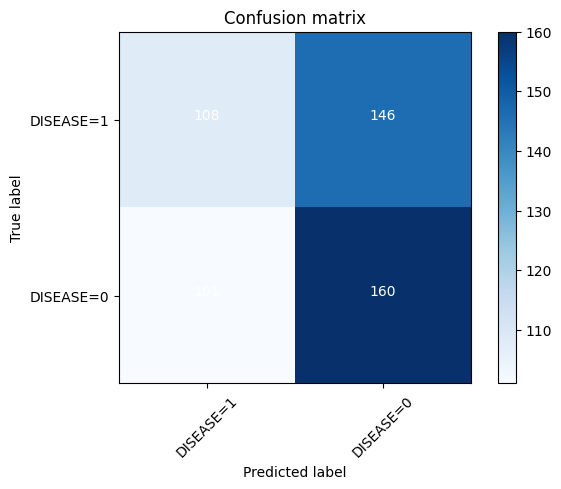

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['DISEASE=1','DISEASE=0'],normalize= False,  title='Confusion matrix')